# Задача 4.
## Вариант 5.

Условие: Рассматривается модель $Y_i = a + bt_{i} + \varepsilon_{i},\; i = 1, ... ,200.$

(Значения $Y_i, i = 1, ... ,200$, заданы для каждого варианта, регрессор $t_i = i$ для всех вариантов).
Предполагается, что вектор $\varepsilon \sim N(\Theta, \sigma^{2}I)$.

Постройте:

1) МНК-оценки параметров $a$ и $b$;
2) Оценку дисперсии $\sigma_{\varepsilon}^{2}$;
3) Оценку коэффициента детерминации;
4) Точечную и интервальную (уровня надёжности $0.95$) оценки для зависимой переменной $Y$ в точках $t_{100} = 100$ и $t_{200} = 200$;
5) Прогноз для значения $Y$ в точке $t = 201$;

Проверьте (на уровне значимости $0.05$):

1) Гипотезу $H_{0}: b = 0$;
2) Гипотезу о гомоскедастичности модели с помощью критерия Голдфелда-Квандта;
3) Рассмотрите модель $Y_i = a + bt_{i} + ct_{i}^{2} + \varepsilon_{i},\; i = 1, ... ,200$. На уровне значимости $0.05$ решите вопрос о том, следует ли включать в модель регрессор $t^{2}$.

### Импорт бибилиотек

In [36]:
import numpy as np
from scipy.stats import t, f
from typing import Tuple
import matplotlib.pyplot as plt
import seaborn as sns

### Чтение данных

In [37]:
data_str = '''
15.0000,20.0000,-0.8155,-9.7856,23.9257,60.4461,66.9275,46.6053,90.7082,118.9212,57.4873,94.2236,56.2336,110.2980,134.3334,110.2115,135.1539,168.4950,173.9473,129.5167,145.8072,187.8151,186.2141,194.9361,142.4693,191.4790,169.0766,171.8193,220.7204,169.1263,162.6296,210.6096,155.0059,183.8975,182.5189,198.1132,247.2652,224.4754,311.3673,274.4193,335.0335,357.9240,348.6795,315.5534,335.4960,359.6788,316.8585,324.0683,377.1340,341.5527,300.8220,320.3915,341.1648,341.5407,341.7580,360.4237,340.6099,315.7136,250.8203,282.8434,265.9253,288.4097,309.8821,332.1850,355.3764,371.6342,398.7242,406.9169,438.7887,454.1951,469.9728,451.7731,415.2939,353.9344,389.6177,399.0614,409.9551,407.1760,368.7405,349.4072,437.4168,440.3080,405.8419,417.8545,453.4596,502.8970,529.5032,532.9202,480.8036,510.4730,506.2447,555.6157,484.4257,518.2287,565.4539,580.0443,546.9830,532.2082,584.4053,526.1691,555.9990,489.3695,494.8899,468.8026,552.1389,575.7312,680.2152,695.0313,715.6860,683.5893,633.4451,674.6337,701.8749,706.6055,701.8846,750.4035,756.2979,704.4677,704.5658,695.3915,749.7405,754.1894,703.1980,683.2118,678.9429,641.6393,669.3799,642.0293,669.4998,687.3361,696.0888,691.2164,706.6306,727.7283,681.4240,684.3736,651.0623,643.0255,674.4648,676.1578,642.4941,615.6782,640.4547,638.4965,635.0000,668.4684,607.6649,679.7148,622.0608,675.5694,698.9163,718.9980,753.0494,757.4323,758.1338,739.6221,747.8734,787.8059,779.6606,767.4471,768.2388,817.6276,852.4826,835.1172,862.2876,865.1854,835.8801,828.3648,809.1743,786.9025,874.5421,929.0026,895.6898,935.9731,891.8093,893.2371,886.6052,833.7216,813.9918,824.7391,905.0511,905.7776,893.8793,895.6718,956.5072,950.8375,981.2002,946.1233,934.0694,993.9253,1007.6457,1011.1132,1052.3381,1052.1178,1016.0922,1047.3365,1025.9078,994.7398,956.9194,991.3817
'''

data = list(map(float, data_str.split(',')))
Y = np.array(data)
n = len(Y)
print(f"Размер выборки: {n}")

Размер выборки: 200


In [38]:
t_values = np.arange(1, n + 1)

### 1. МНК-оценки параметров $a$ и $b$

Необходимо минимизировать функционал ошибки:

$$
Q = \sum_{i = 1}^{200}{\varepsilon_{i}^{2}} = \sum_{i = 1}^{200}{(Y_i - a - b \cdot t_i)^{2}} \rightarrow \min_{a, b}
$$

Для этого найдём дифференциал функционала ошибки по каждому параметру:

$$
\begin{equation}
\begin{cases}
\frac{\Delta Q}{\Delta a} = -2 \cdot \displaystyle\sum_{i = 1}^{200}{(Y_i - a - b \cdot t_i)} = 0\\
\frac{\Delta Q}{\Delta b} = -2 \cdot \displaystyle\sum_{i = 1}^{200}{t_i \cdot (Y_i - a - b \cdot t_i)} = 0
\end{cases}
\end{equation}
$$

Решив эту систему уравнений, получим оценённые параметры:

$$
\begin{equation}
\begin{cases}
\hat{a} = \overline{Y} - \hat{b} \cdot \overline{t}\\\\
\hat{b} = \frac{\displaystyle\sum_{i = 1}^{200}{(t_i - \overline{t})(Y_i - \overline{Y})}}{\displaystyle\sum_{i = 1}^{200}{(t_i - \overline{t})^2}}
\end{cases}
\end{equation}
$$

In [39]:
t_mean = np.mean(t_values)
Y_mean = np.mean(Y)

b = np.sum((t_values - t_mean) * (Y - Y_mean)) / np.sum((t_values - t_mean) ** 2)
a = Y_mean - b * t_mean

print(f"МНК-оценки:\na = {a:.4f}\nb = {b:.4f}")

МНК-оценки:
a = 61.6150
b = 4.7120


### 2. Оценка дисперсии $\sigma_{\varepsilon}^{2}$

Оценка дисперсии производится по формуле:

$$
\sigma_{\varepsilon}^{2} = \frac{\text{RSS}}{n - p - 1},
$$

где

- $\text{RSS} = \sum_{i = 1}^{200}{(Y_i - \hat{Y_i})^2}$ - residual sum of squares
- n - количество наблюдений
- p - количество регрессоров


In [40]:
Y_prediction = a + b * t_values
p = 1

rss = np.sum((Y - Y_prediction) ** 2)
sigma_error = rss / (n - p - 1)

print(f"Оценка дисперсии: sigma_error = {sigma_error:.4f}")

Оценка дисперсии: sigma_error = 3177.6438


### 3. Оценка коэффициента детерминации

Оценка коэффициента детерминации считается по формуле:

$$
R^{2} = \frac{\text{ESS}}{\text{TSS}},
$$

где

- $\text{ESS} = \sum_{i = 1}^{200}{(\hat{Y_i} - \overline{Y})^2}$ - estimated sum of squares
- $\text{TSS} = \sum_{i = 1}^{200}{(Y_i - \overline{Y_i})^2} = \text{RSS} + \text{ESS}$ - total sum of squares

In [41]:
ess = np.sum((Y_prediction - Y_mean) ** 2)
tss = rss + ess

r2 = ess / tss

print(f"Коэффициент детерминации R^2 = {r2:.4f}")

Коэффициент детерминации R^2 = 0.9592


### 4. Точечная и интервальная (уровня надёжности $0.95$) оценка для зависимой переменной $Y$ в точках $t_{100} = 100$ и $t_{200} = 200$

Точечная оценка вычисляется по формуле $Y(t_{i}) = a + b \cdot t_i$.

Для нахождения интервальной оценки используем доверительный интервал:

$$
\left[ \hat{Y} - t_{(1 - \frac{\alpha}{2},\; n - p - 1)} \cdot \sqrt{\sigma_{\varepsilon}^{2} \cdot \left( \frac{1}{n} + \frac{(t_0 - \overline{t})^2}{\displaystyle\sum_{i = 1}^{n}(t_{i} - \overline{t})^2} \right) } < Y < \hat{Y} + t_{(1 - \frac{\alpha}{2},\; n - p - 1)} \cdot \sqrt{\sigma_{\varepsilon}^{2} \cdot \left( \frac{1}{n} + \frac{(t_0 - \overline{t})^2}{\displaystyle\sum_{i = 1}^{n}(t_{i} - \overline{t})^2} \right) } \right]
$$

In [42]:
def point_estimate(t0: float) -> float:
    return a + b * t0

def print_point_estimate(t0: float):
    y0 = point_estimate(t0)
    print(f"Точечная оценка Y({t0}) = {y0:.4f}")

def confidence_interval(t0: float, alpha: float = 0.05) -> Tuple[float, float]:
    t_crit = t.ppf(1 - alpha / 2, df=n-p-1)

    y0 = point_estimate(t0)
    se = np.sqrt(sigma_error * (1 / n + (t0 - t_mean)**2 / np.sum((t_values - t_mean)**2)))

    left_border = y0 - t_crit * se
    right_border = y0 + t_crit * se

    return left_border, right_border

def print_confidence_interval(t0: float):
    ci = confidence_interval(t0)
    print(f"Интервальная оценка Y({t0}) = [{ci[0]:.4f}, {ci[1]:.4f}]\n")

t100 = 100
t200 = 200
print_point_estimate(t100)
print_confidence_interval(t100)

print_point_estimate(t200)
print_confidence_interval(t200)

Точечная оценка Y(100) = 532.8140
Интервальная оценка Y(100) = [524.9533, 540.6748]

Точечная оценка Y(200) = 1004.0130
Интервальная оценка Y(200) = [988.3508, 1019.6752]



### 5. Прогноз для значения $Y$ в точке $t = 201$

Посчитаем прогноз для значения $Y$ в точке $t = 201$, используя формулу $Y(t_{i}) = a + b \cdot t_i$.

In [43]:
def predict(t0: float) -> float:
    return a + b * t0

t201 = 201
print(f"Прогноз Y({t201}) = {predict(t201):.4f}")
print_confidence_interval(t201)

Прогноз Y(201) = 1008.7250
Интервальная оценка Y(201) = [992.9449, 1024.5051]



### 6. Проверка гипотезы $H_{0}: b = 0$

$H_{0}: b = 0$

$H_{A}: b \neq 0$

Для проверки используем t-тест, так как истинная дисперсия неизвестна.

Найдём статистику по формуле:

$$
T = \frac{\hat{b} - b}{\hat{\sigma_{b}}} \sim t(n - p - 1)
$$

Для этого необходимо вычислить среднеквадратическое отклонение параметра $b$:

$$
{\hat{\sigma_{b}}} = \sqrt{\frac{\sigma_{\varepsilon}^{2}}{\displaystyle\sum_{i}^{n}{(t_{i} - \overline{t})^{2}}}},
$$

In [44]:
b_hypothesis = 0
sigma_b = np.sqrt(sigma_error / np.sum((t_values - t_mean) ** 2))
t0 = (b - b_hypothesis) / sigma_b

alpha = 0.05
t_crit = t.ppf(1 - alpha / 2, df=n-p-1)

result = " "
if np.abs(t0) < t_crit:
    result = " не "

print(f"Статистика t0 = {t0:.4f}")
print(f"Критическое значение t_crit = {t_crit:.4f}")
print(f"H0{result}отвергается.")

Статистика t0 = 68.2497
Критическое значение t_crit = 1.9720
H0 отвергается.


**Ответ:** Параметр $b \neq 0$.

### 7. Проверка гипотезы о гомоскедастичности модели с помощью критерия Голдфелда-Квандта

Необходимо отсортировать наблюдения по регрессору t (в данной задаче они уже идут по возрастанию).

Разделим выборку на 3 части:

1. Нижняя: первые $m = \frac{3}{8}$ наблюдений.
2. Средняя: центральные $\frac{1}{4}$ наблюдений.
3. Верхняя: последние $m = \frac{3}{8}$ наблюдений.


Будем работать с первой и последней частью. Для каждой посчитаем сумму квадратов остатков RSS и найдём F-статистику:

$$
F = \frac{\frac{RSS_{1}}{n_{1} - p 1}}{\frac{RSS_{2}}{n_{2} - p 1}} = \frac{RSS_{1}}{RSS_{2}} \sim F(m - p - 1, m - p - 1),
$$

где $RSS_{1} > RSS_{2}$.

Если $F < F_{crit}$, то гипотеза о гомоскедастичности не отвергается.


In [45]:
p = 1
alpha = 0.05
m = int(n * 3 / 8)

t_lower = t_values[:m]
Y_lower = Y[:m]

t_upper = t_values[m:]
Y_upper = Y[m:]

rss1 = np.sum((Y_lower - np.mean(Y_lower)) ** 2)
rss2 = np.sum((Y_upper - np.mean(Y_upper)) ** 2)
if rss1 < rss2:
    rss1, rss2 = rss2, rss1

f0 = rss1 / rss2
f_crit = f.ppf(1 - alpha, dfn=m-p-1, dfd=m-p-1)

result = " "
if np.abs(f0) < f_crit:
    result = " не "

print(f"Статистика f0 = {f0:.4f}")
print(f"Критическое значение f_crit = {f_crit:.4f}")
print(f"H0{result}отвергается.")

Статистика f0 = 3.1280
Критическое значение f_crit = 1.4734
H0 отвергается.


**Ответ:** Гипотеза о гомоскедастичности отвергается.

### 8. Проверка расширенной регрессии $Y_i = a + bt_{i} + ct_{i}^{2} + \varepsilon_{i}$

Исходная модель: $Y_i = a + bt_{i} + \varepsilon_{i}$.

Рассмотрим модель $Y_i = a + bt_{i} + ct_{i}^{2} + \varepsilon_{i},\; i = 1, ... ,200$.

Необходимо посчитать RSS исходной и расширенной модели и найти F-статистику:

$$
F = \frac{\frac{RSS_{1} - RSS_{2}}{p_{2} - p_{1}}}{\frac{RSS_{2}}{n - p_{2}}} \sim F(p_{2} - p_{1}, n - p_{2} - 1)
$$

Где:

- $RSS_{1}$ - сумма квадратов остатков изначальной модели.
- $RSS_{2}$ - сумма квадратов остатков расширенной модели.
- $p_{1} = 1$ - количество регрессоров в изначальной модели.
- $p_{2} = 2$ - количество регрессоров в расширенной модели.

Если полученная статистика меньше критического значения, то добавление $t^{2}$ не дало улучшения.

In [46]:
X = np.stack([np.ones_like(t_values), t_values, t_values**2]).T
Y_predicted_new = X @ np.linalg.inv(X.T @ X) @ X.T @ Y
rss_new = np.sum((Y_predicted_new - Y) ** 2)

p1 = 1
p2 = 2

f0 = ((rss - rss_new) / (p2 - p1)) / (rss_new / (n - p2 - 1))
f_crit = f.ppf(1 - alpha, dfn=p2-p1, dfd=n-p2-1)

result = " "
if np.abs(f0) < f_crit:
    result = " не "

print(f"Статистика f0 = {f0:.4f}")
print(f"Критическое значение f_crit = {f_crit:.4f}")
print(f"H0{result}отвергается.")

Статистика f0 = 7.5454
Критическое значение f_crit = 3.8891
H0 отвергается.


**Ответ:** Гипотеза о незначимости расширения гипотезы отвергается. Следовательно, добавление регрессора улучшило модель.

### А теперь немножко красоты

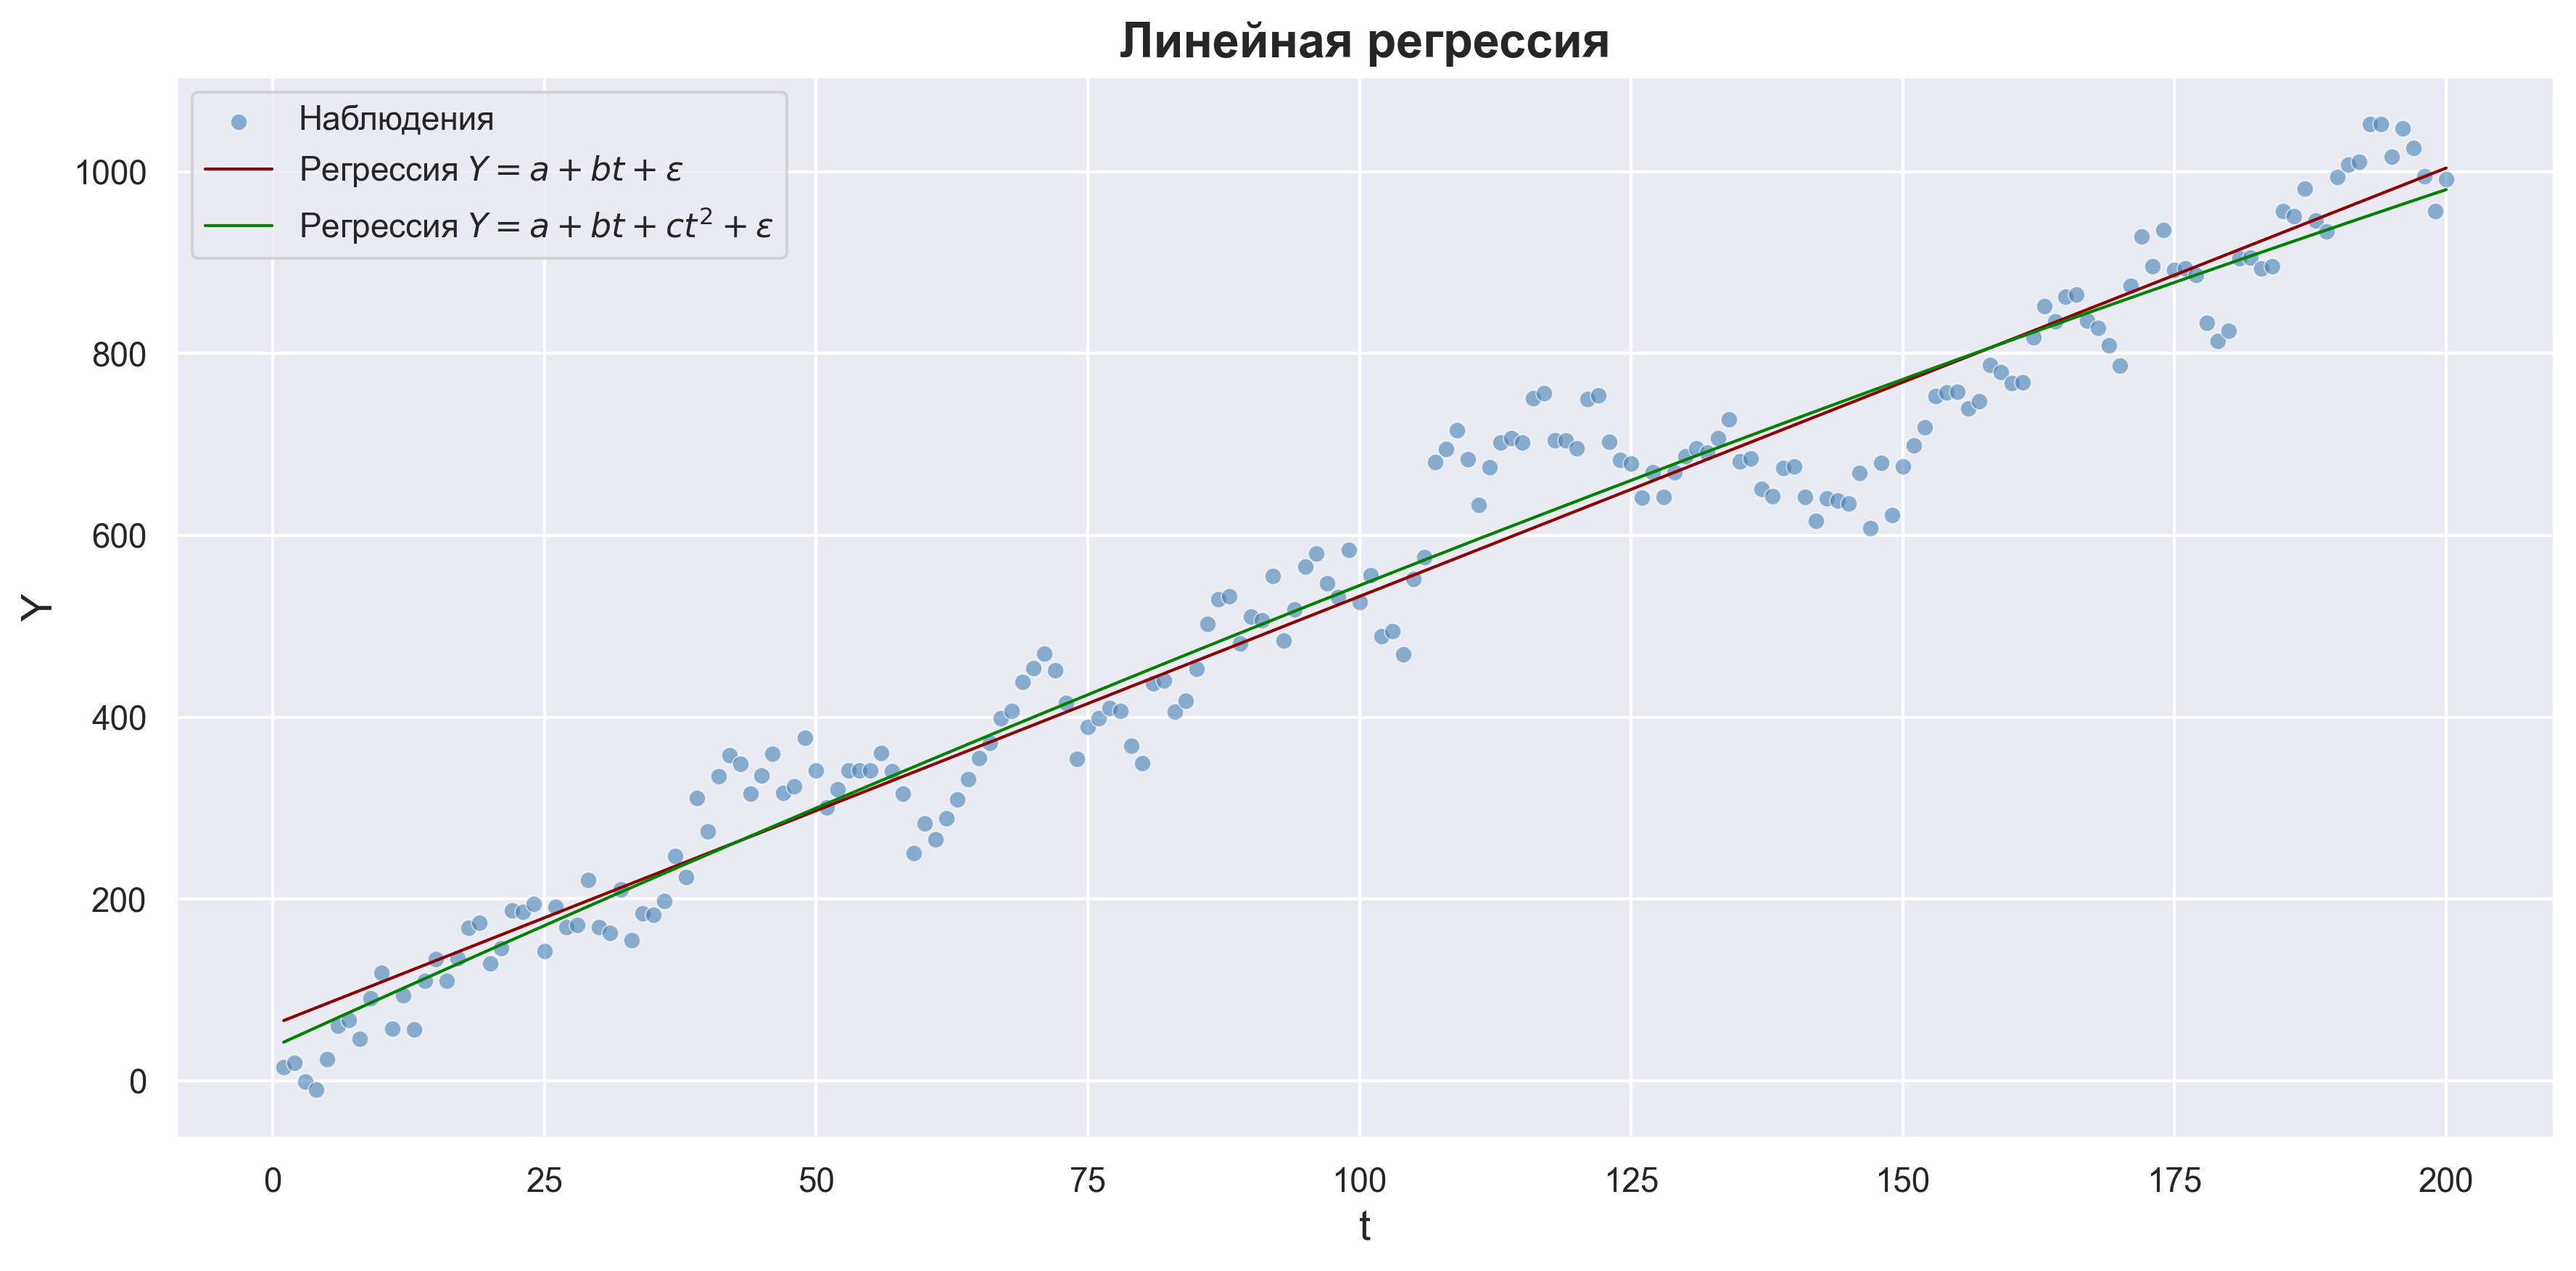

In [47]:
sns.set_theme(palette="bright")

plt.figure(figsize=(12, 6), dpi=300)

sns.scatterplot(x=t_values, y=Y, label="Наблюдения", s=30, color="steelblue", alpha=0.6)

plt.plot(t_values, Y_prediction, label="Регрессия $Y = a + bt + \\varepsilon$", color="darkred", linewidth=1)
plt.plot(t_values, Y_predicted_new, label="Регрессия $Y = a + bt + ct^2 + \\varepsilon$", color="green", linewidth=1)

plt.xlabel("t", fontsize=14)
plt.ylabel("Y", fontsize=14)
plt.title("Линейная регрессия", fontsize=16, fontweight='bold')
plt.legend()
plt.tight_layout()
plt.show()

<img src="https://raw.githubusercontent.com/vasyukov1/HSE-FCS-SE-2-year/refs/heads/main/IAD/homeworks/hw08-boosting-clustering/meme.jpg" alt="meme" style="width: 700px;"/>